--- Scikit-Learn Logistic Regression Results ---
Training Time: 0.031952 seconds
Accuracy: 0.8350
Precision: 0.8090
Recall: 0.8182
F1-Score: 0.8136

Confusion Matrix:
[[95 17]
 [16 72]]


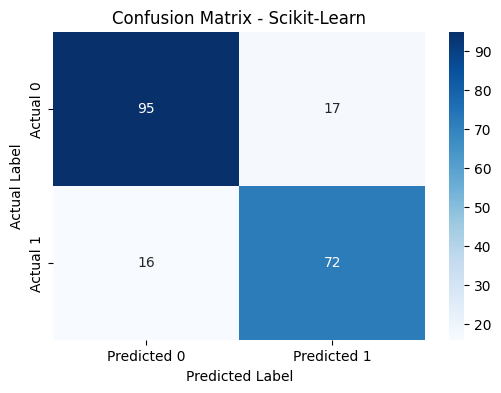

In [1]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Generate Sample Data & Preprocess ---
# Creating a synthetic dataset for binary classification
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better performance (good practice for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 2. Import and Train the Model ---
# Initialize the LogisticRegression model
# The 'solver' and 'C' are hyperparameters you can tune.
# 'lbfgs' is a good default solver. 'C' is the inverse of regularization strength.
model = LogisticRegression(random_state=42)

# Measure training time
start_time = time.time()
model.fit(X_train_scaled, y_train) # Training the model
end_time = time.time()

sklearn_training_time = end_time - start_time


# --- 3. Evaluate the Model ---
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# --- Display Results ---
print("--- Scikit-Learn Logistic Regression Results ---")
print(f"Training Time: {sklearn_training_time:.6f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Scikit-Learn')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Logistic Regression: Complete Workflow

This notebook demonstrates the full process of logistic regression, including:

- Generating synthetic data
- Preprocessing and scaling features
- Training a logistic regression model
- Evaluating model performance
- Visualizing the decision boundary (for 2D data)

Logistic regression is a supervised learning algorithm used for binary classification tasks. It models the probability that a given input belongs to a particular class.

In [2]:
# --- Generate 2D Synthetic Data for Decision Boundary Visualization ---
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# 2D data for visualization
X2, y2 = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=1, random_state=42)

# Split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [3]:
# --- Train Logistic Regression on 2D Data ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model2 = LogisticRegression(random_state=42)
model2.fit(X2_train_scaled, y2_train)

y2_pred = model2.predict(X2_test_scaled)

accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)
f12 = f1_score(y2_test, y2_pred)
conf_matrix2 = confusion_matrix(y2_test, y2_pred)

print("--- 2D Logistic Regression Results ---")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-Score: {f12:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix2)

--- 2D Logistic Regression Results ---
Accuracy: 0.8800
Precision: 0.8776
Recall: 0.8776
F1-Score: 0.8776

Confusion Matrix:
[[45  6]
 [ 6 43]]


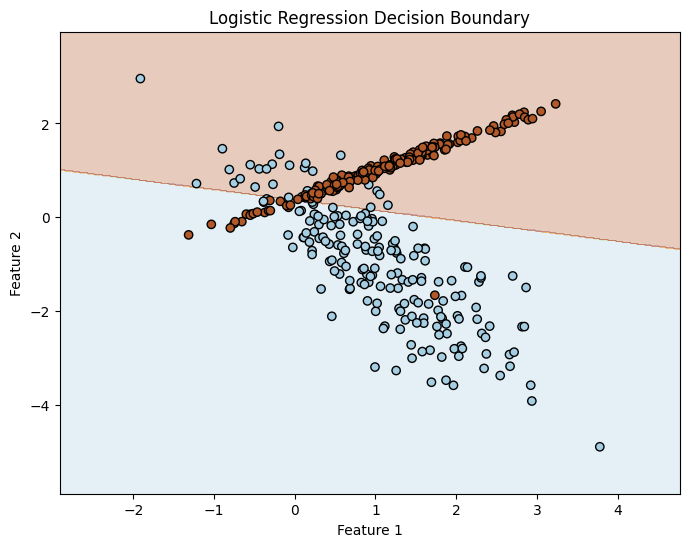

In [4]:
# --- Visualize Decision Boundary ---
def plot_decision_boundary(model, X, y, scaler):
    # Create a mesh to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot using training data
plot_decision_boundary(model2, X2_train, y2_train, scaler2)

## Decision Boundary & Interpretation
The decision boundary is the line (or surface in higher dimensions) that separates the classes predicted by the logistic regression model. In 2D, it is visualized as a curve or straight line.

- Points on one side of the boundary are classified as class 0, and on the other as class 1.
- The boundary is determined by the model's learned coefficients.

**Model Metrics:**
- **Accuracy:** Proportion of correct predictions.
- **Precision:** Proportion of positive identifications that were actually correct.
- **Recall:** Proportion of actual positives that were identified correctly.
- **F1-Score:** Harmonic mean of precision and recall.

Use these metrics and the decision boundary plot to assess model performance and understand how logistic regression separates classes.